In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
columns = [
    "num_pregnant",
    "plasma_glucose",
    "diastolic_bp",
    "triceps_skin_fold_thickness",
    "2_hour_serum_insulin",
    "bmi",
    "diabetes_pedigree_func",
    "age",
    "diabetes"]
df = pd.read_csv(url, names=columns)
df.head()

,num_pregnant,plasma_glucose,diastolic_bp,triceps_skin_fold_thickness,2_hour_serum_insulin,bmi,diabetes_pedigree_func,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
target = df["diabetes"]
target_names = ["negative", "positive"]

In [4]:
data = df.drop("diabetes", axis=1)
feature_names = data.columns
data.head()

,num_pregnant,plasma_glucose,diastolic_bp,triceps_skin_fold_thickness,2_hour_serum_insulin,bmi,diabetes_pedigree_func,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.667
k: 3, Train/Test Score: 0.847/0.641
k: 5, Train/Test Score: 0.807/0.656
k: 7, Train/Test Score: 0.799/0.682
k: 9, Train/Test Score: 0.797/0.714
k: 11, Train/Test Score: 0.795/0.693
k: 13, Train/Test Score: 0.790/0.740
k: 15, Train/Test Score: 0.786/0.740
k: 17, Train/Test Score: 0.786/0.714
k: 19, Train/Test Score: 0.781/0.714


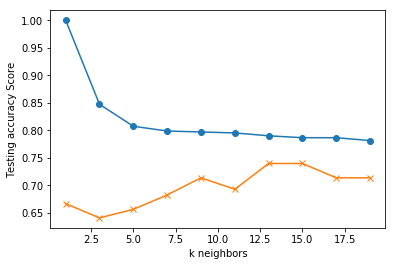

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.740
